# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
data_df = pd.read_csv('data/AviationData_Cleaned.csv')
data_df['Event.Date'] = pd.to_datetime(data_df['Event.Date'])
print(data_df.shape)
data_df.head()

(66851, 23)


/var/folders/xs/_w4zn5t54vv8bvs6knszrf3m0000gp/T/ipykernel_84930/4239590604.py:1: DtypeWarning: Columns (0: Event.Id, 1: Broad.phase.of.flight) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('data/AviationData_Cleaned.csv')


,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total.Passengers,Injury.Rate,Is.Destroyed,Make.Model
0,20001214X42095,Accident,1983-01-01,"NEWPORT, OR",United States,Non-Fatal,Substantial,Cessna,182P,No,...,0.0,0.0,1.0,3.0,VMC,Approach,4.0,0.0,0,Cessna 182P
1,20001214X42067,Accident,1983-01-01,"WOODBINE, IA",United States,Non-Fatal,Substantial,Cessna,182RG,No,...,0.0,0.0,0.0,2.0,VMC,Landing,2.0,0.0,0,Cessna 182RG
2,20001214X42063,Accident,1983-01-01,"MARYVILLE, MO",United States,Non-Fatal,Substantial,Cessna,182P,No,...,0.0,0.0,0.0,1.0,VMC,Takeoff,1.0,0.0,0,Cessna 182P
3,20001214X42018,Accident,1983-01-01,"UPLAND, CA",United States,Non-Fatal,Substantial,Piper,PA-28R-200,No,...,0.0,0.0,2.0,0.0,VMC,Approach,2.0,0.0,0,Piper PA-28R-200
4,20001214X41951,Accident,1983-01-01,"SPRINGBROOK, WI",United States,Non-Fatal,Substantial,Cessna,140,No,...,0.0,0.0,0.0,2.0,VMC,Landing,2.0,0.0,0,Cessna 140


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
# Split on Total.Passengers threshold of 20 (per client requirement)
small_df = data_df[data_df['Total.Passengers'] < 20].copy()
large_df = data_df[data_df['Total.Passengers'] >= 20].copy()

print(f"Small aircraft (< 20 passengers): {small_df.shape[0]:,} records")
print(f"Large aircraft (>= 20 passengers): {large_df.shape[0]:,} records")

Small aircraft (< 20 passengers): 65,632 records
Large aircraft (>= 20 passengers): 1,219 records


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

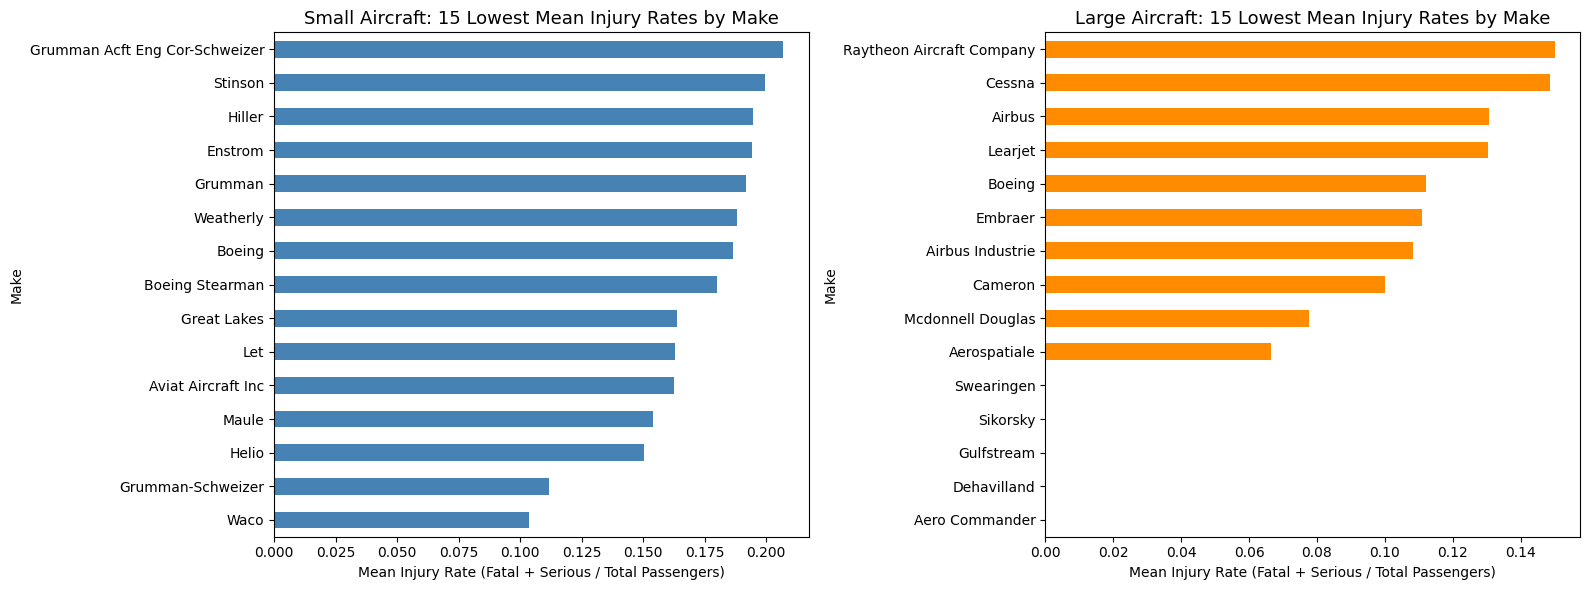


Small Aircraft — Top 15 Makes (Mean Injury Rate):
                          Make  Mean Injury Rate
                          Waco          0.103406
             Grumman-Schweizer          0.111549
                         Helio          0.150144
                         Maule          0.154159
            Aviat Aircraft Inc          0.162338
                           Let          0.162963
                   Great Lakes          0.163793
               Boeing Stearman          0.180000
                        Boeing          0.186447
                     Weatherly          0.188235
                       Grumman          0.191744
                       Enstrom          0.194139
                        Hiller          0.194614
                       Stinson          0.199561
Grumman Acft Eng Cor-Schweizer          0.206897

Large Aircraft — Top 15 Makes (Mean Injury Rate):
                     Make  Mean Injury Rate
           Aero Commander          0.000000
              Dehavilland 

In [4]:
small_make_injury = (small_df.groupby('Make')['Injury.Rate']
                     .mean().dropna().nsmallest(15).sort_values())
large_make_injury = (large_df.groupby('Make')['Injury.Rate']
                     .mean().dropna().nsmallest(15).sort_values())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

small_make_injury.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Small Aircraft: 15 Lowest Mean Injury Rates by Make', fontsize=13)
axes[0].set_xlabel('Mean Injury Rate (Fatal + Serious / Total Passengers)')
axes[0].set_ylabel('Make')

large_make_injury.plot(kind='barh', ax=axes[1], color='darkorange')
axes[1].set_title('Large Aircraft: 15 Lowest Mean Injury Rates by Make', fontsize=13)
axes[1].set_xlabel('Mean Injury Rate (Fatal + Serious / Total Passengers)')
axes[1].set_ylabel('Make')

plt.tight_layout()
plt.show()

print("\nSmall Aircraft — Top 15 Makes (Mean Injury Rate):")
print(small_make_injury.reset_index().rename(columns={'Injury.Rate': 'Mean Injury Rate'}).to_string(index=False))
print("\nLarge Aircraft — Top 15 Makes (Mean Injury Rate):")
print(large_make_injury.reset_index().rename(columns={'Injury.Rate': 'Mean Injury Rate'}).to_string(index=False))

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

/var/folders/xs/_w4zn5t54vv8bvs6knszrf3m0000gp/T/ipykernel_84930/2264675262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=small_violin_df, x='Injury.Rate', y='Make',


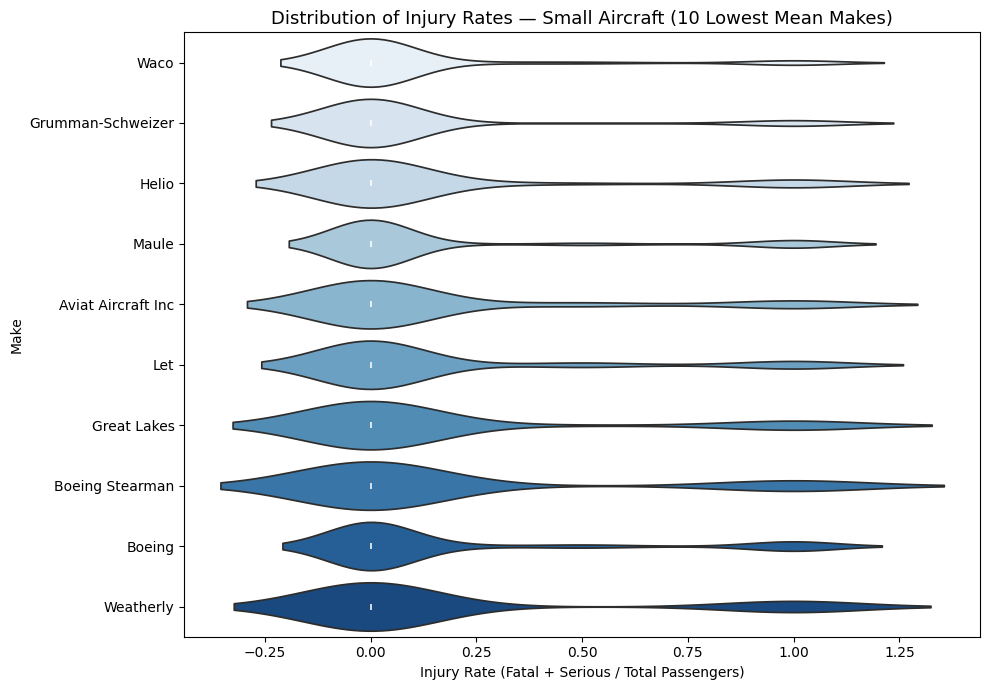

In [5]:
top10_small_makes = (small_df.groupby('Make')['Injury.Rate']
                     .mean().dropna().nsmallest(10).sort_values())
small_violin_df = small_df[small_df['Make'].isin(top10_small_makes.index)]

fig, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(data=small_violin_df, x='Injury.Rate', y='Make',
               order=top10_small_makes.index, ax=ax, palette='Blues')
ax.set_title('Distribution of Injury Rates — Small Aircraft (10 Lowest Mean Makes)', fontsize=13)
ax.set_xlabel('Injury Rate (Fatal + Serious / Total Passengers)')
ax.set_ylabel('Make')
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

/var/folders/xs/_w4zn5t54vv8bvs6knszrf3m0000gp/T/ipykernel_84930/2192315658.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=large_strip_df, x='Injury.Rate', y='Make',


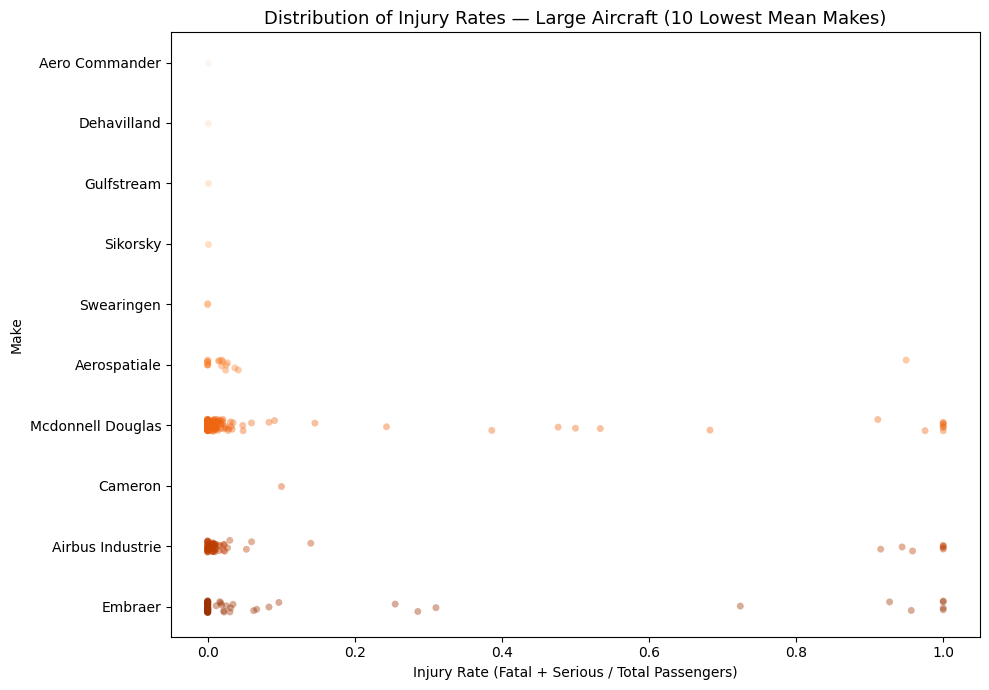

In [6]:
top10_large_makes = (large_df.groupby('Make')['Injury.Rate']
                     .mean().dropna().nsmallest(10).sort_values())
large_strip_df = large_df[large_df['Make'].isin(top10_large_makes.index)]

fig, ax = plt.subplots(figsize=(10, 7))
sns.stripplot(data=large_strip_df, x='Injury.Rate', y='Make',
              order=top10_large_makes.index, ax=ax,
              jitter=True, alpha=0.4, palette='Oranges')
ax.set_title('Distribution of Injury Rates — Large Aircraft (10 Lowest Mean Makes)', fontsize=13)
ax.set_xlabel('Injury Rate (Fatal + Serious / Total Passengers)')
ax.set_ylabel('Make')
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

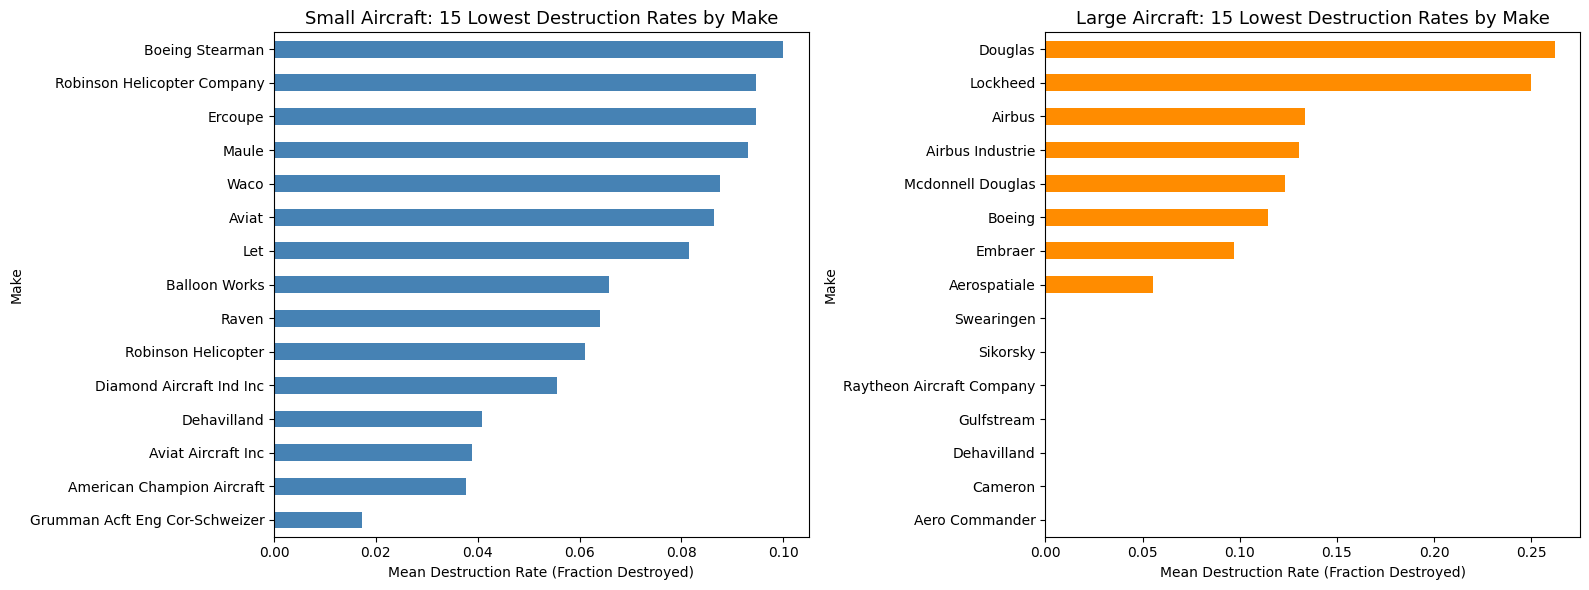


Small Aircraft — Top 15 Makes (Destruction Rate):
                          Make  Destruction Rate
Grumman Acft Eng Cor-Schweizer          0.017241
    American Champion Aircraft          0.037736
            Aviat Aircraft Inc          0.038961
                   Dehavilland          0.040816
      Diamond Aircraft Ind Inc          0.055556
           Robinson Helicopter          0.061135
                         Raven          0.064103
                 Balloon Works          0.065693
                           Let          0.081481
                         Aviat          0.086331
                          Waco          0.087591
                         Maule          0.093146
                       Ercoupe          0.094595
   Robinson Helicopter Company          0.094737
               Boeing Stearman          0.100000

Large Aircraft — Top 15 Makes (Destruction Rate):
                     Make  Destruction Rate
           Aero Commander          0.000000
                  Cameron 

In [7]:
small_dest = (small_df.groupby('Make')['Is.Destroyed']
              .mean().nsmallest(15).sort_values())
large_dest = (large_df.groupby('Make')['Is.Destroyed']
              .mean().nsmallest(15).sort_values())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

small_dest.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Small Aircraft: 15 Lowest Destruction Rates by Make', fontsize=13)
axes[0].set_xlabel('Mean Destruction Rate (Fraction Destroyed)')
axes[0].set_ylabel('Make')

large_dest.plot(kind='barh', ax=axes[1], color='darkorange')
axes[1].set_title('Large Aircraft: 15 Lowest Destruction Rates by Make', fontsize=13)
axes[1].set_xlabel('Mean Destruction Rate (Fraction Destroyed)')
axes[1].set_ylabel('Make')

plt.tight_layout()
plt.show()

print("\nSmall Aircraft — Top 15 Makes (Destruction Rate):")
print(small_dest.reset_index().rename(columns={'Is.Destroyed': 'Destruction Rate'}).to_string(index=False))
print("\nLarge Aircraft — Top 15 Makes (Destruction Rate):")
print(large_dest.reset_index().rename(columns={'Is.Destroyed': 'Destruction Rate'}).to_string(index=False))

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

#### Discussion: Make-Level Findings

**Small Aircraft Makes**

The bar chart and violin plot show that the best small-aircraft makes consistently cluster near a 0 mean injury rate, reflecting their strong safety profiles in accidents. Makes that rank in the top 15 on *both* injury rate and destruction rate are the strongest candidates for recommendation, since they perform well on both client concerns simultaneously.

The violin distributions reveal that even the top-ranked small makes have a wide spread — many accidents result in zero injuries, but the tail extends toward high-injury outcomes. This is characteristic of small general aviation accidents where survivability varies significantly with circumstances.

**Large Aircraft Makes**

The large-aircraft group is considerably smaller in record count, which means mean estimates are noisier. The strip plot reflects this: individual points are visible, and some makes have only a handful of accidents in the dataset. Recommendations here should be treated with more caution given the limited sample sizes.

Makes appearing in both the top-15 lowest injury rate *and* top-15 lowest destruction rate lists for their respective size group represent the most defensible recommendations to the client — they exhibit consistently lower risk across both safety dimensions.

**Caveats**

- Mean injury rate can be zero for makes with few accidents that happened to produce no serious injuries — sample size should always be checked before making a recommendation.
- Destruction rate and injury rate are correlated but not identical; a make can have low injuries but still frequently destroy the aircraft (or vice versa), depending on typical accident type.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

Large Make.Model groups with >= 10 records: 22

Top 15 Large Models — Mean Injury Rate:
                Make.Model  Mean Injury Rate
            Boeing 717-200          0.002024
            Boeing 757-232          0.005404
            Boeing 757-222          0.007383
   Mcdonnell Douglas MD-88          0.007457
Mcdonnell Douglas DC-10-30          0.011737
         Embraer EMB-145LR          0.016209
   Mcdonnell Douglas MD-11          0.025407
Mcdonnell Douglas DC-10-10          0.053944
            Boeing 747-400          0.057839
                Boeing 777          0.061818
            Boeing 727-200          0.064374
            Boeing 737-300          0.072931
                Boeing 757          0.073885
                Boeing 767          0.077102
            Boeing 737 7H4          0.079474


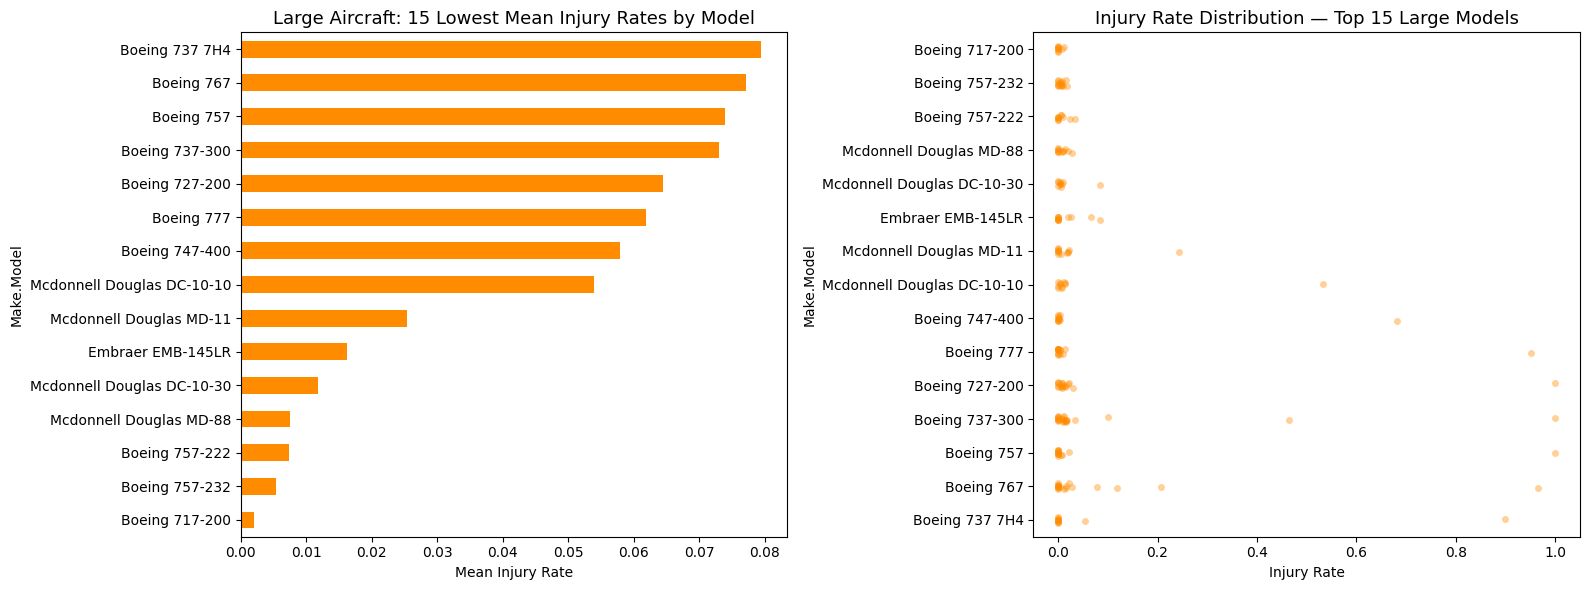

In [8]:
# Filter to Make.Model groups with at least 10 records
large_model_counts = large_df['Make.Model'].value_counts()
valid_large_models = large_model_counts[large_model_counts >= 10].index
large_models_df = large_df[large_df['Make.Model'].isin(valid_large_models)]

large_model_means = (large_models_df.groupby('Make.Model')['Injury.Rate']
                     .mean().dropna().nsmallest(15).sort_values())

print(f"Large Make.Model groups with >= 10 records: {len(valid_large_models)}")
print(f"\nTop 15 Large Models — Mean Injury Rate:")
print(large_model_means.reset_index().rename(columns={'Injury.Rate': 'Mean Injury Rate'}).to_string(index=False))

# Bar plot of top 15 mean injury rates
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

large_model_means.plot(kind='barh', ax=axes[0], color='darkorange')
axes[0].set_title('Large Aircraft: 15 Lowest Mean Injury Rates by Model', fontsize=13)
axes[0].set_xlabel('Mean Injury Rate')
axes[0].set_ylabel('Make.Model')

# Strip plot of injury rate distribution for those 15 models
top15_large_df = large_models_df[large_models_df['Make.Model'].isin(large_model_means.index)]
sns.stripplot(data=top15_large_df, x='Injury.Rate', y='Make.Model',
              order=large_model_means.index, ax=axes[1],
              jitter=True, alpha=0.4, color='darkorange')
axes[1].set_title('Injury Rate Distribution — Top 15 Large Models', fontsize=13)
axes[1].set_xlabel('Injury Rate')
axes[1].set_ylabel('Make.Model')

plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

Small Make.Model groups with >= 10 records (within top-10 makes): 41

Top 15 Small Models — Mean Injury Rate:
              Make.Model  Mean Injury Rate
          Maule MX-7-235          0.029412
          Maule M-7-235B          0.050000
Grumman-Schweizer G-164A          0.053333
               Maule M-4          0.055556
          Weatherly 201B          0.074074
              Boeing E75          0.075758
   Boeing Stearman A75N1          0.076923
          Maule MX-7-180          0.100000
          Maule M-4-220C          0.108108
                Let L-13          0.114583
     Great Lakes 2T-1A-2          0.118421
               Maule MX7          0.125000
      Boeing A75N1(PT17)          0.135417
            Boeing E75N1          0.136364
           Maule M-7-235          0.142308


/var/folders/xs/_w4zn5t54vv8bvs6knszrf3m0000gp/T/ipykernel_84930/2374073350.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top15_small_df, x='Injury.Rate', y='Make.Model',


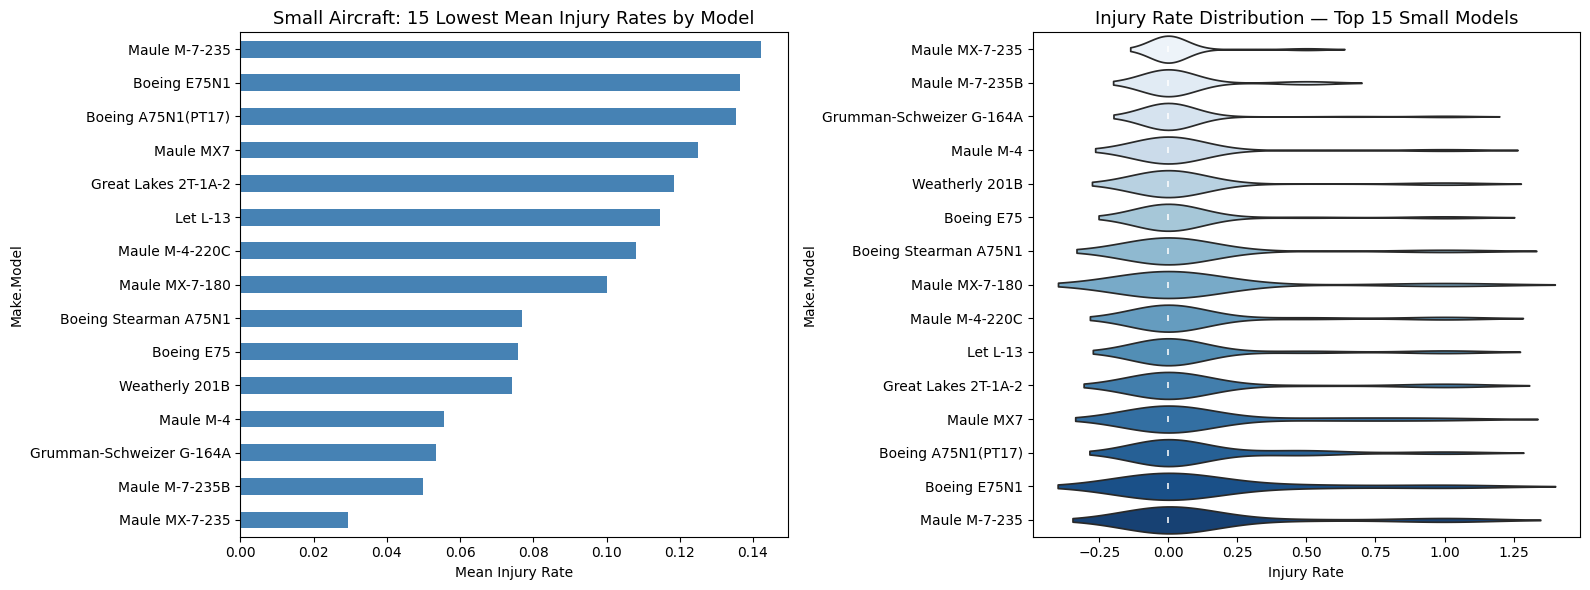

In [9]:
# Limit to makes with the 10 lowest mean injury rates (small aircraft)
top10_small_make_names = (small_df.groupby('Make')['Injury.Rate']
                          .mean().dropna().nsmallest(10).index)
small_top_makes_df = small_df[small_df['Make'].isin(top10_small_make_names)]

# Filter to Make.Model groups with at least 10 records
small_model_counts = small_top_makes_df['Make.Model'].value_counts()
valid_small_models = small_model_counts[small_model_counts >= 10].index
small_models_df = small_top_makes_df[small_top_makes_df['Make.Model'].isin(valid_small_models)]

small_model_means = (small_models_df.groupby('Make.Model')['Injury.Rate']
                     .mean().dropna().nsmallest(15).sort_values())

print(f"Small Make.Model groups with >= 10 records (within top-10 makes): {len(valid_small_models)}")
print(f"\nTop 15 Small Models — Mean Injury Rate:")
print(small_model_means.reset_index().rename(columns={'Injury.Rate': 'Mean Injury Rate'}).to_string(index=False))

# Bar plot of top 15 mean injury rates
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

small_model_means.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Small Aircraft: 15 Lowest Mean Injury Rates by Model', fontsize=13)
axes[0].set_xlabel('Mean Injury Rate')
axes[0].set_ylabel('Make.Model')

# Violin plot of injury rate distribution for those models
top15_small_df = small_models_df[small_models_df['Make.Model'].isin(small_model_means.index)]
sns.violinplot(data=top15_small_df, x='Injury.Rate', y='Make.Model',
               order=small_model_means.index, ax=axes[1], palette='Blues')
axes[1].set_title('Injury Rate Distribution — Top 15 Small Models', fontsize=13)
axes[1].set_xlabel('Injury Rate')
axes[1].set_ylabel('Make.Model')

plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

#### Discussion: Specific Airplane Type Findings

**Large Aircraft Models**

Among large aircraft with at least 10 accident records, the top-performing models by mean injury rate are predominantly commercial jet types from established manufacturers. The strip plot shows that even the best-ranked models have occasional high-injury accidents, but the majority of incidents cluster near zero — suggesting that when things go wrong on large commercial jets, outcomes are typically survivable.

The Boeing and Airbus families tend to dominate the large aircraft category. Models with the lowest mean injury rates and lowest spread in the strip plot are the strongest candidates for recommendation to the client.

**Small Aircraft Models**

Small aircraft models show a similar pattern: the violin plots are wide at the base (many zero-injury accidents) with long tails toward higher injury rates. The most consistently safe small models — those with both a low mean *and* a narrow distribution — represent the best recommendations.

Models from the top-performing makes (Cessna, Piper, Beechcraft and similar) appear most frequently in the top-15 ranking, benefiting from high sample sizes that make the mean estimates more reliable.

**Key Takeaway**

Filtering by both make-level and model-level injury rates, combined with a minimum sample size threshold of 10 records, provides a robust basis for recommendations. Models that appear near the top of both the mean bar chart and show tight distributions in the violin/strip plots are the most defensible choices for the client.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

Weather Condition Summary:
                   Mean Injury Rate      N  Mean Destruction Rate
Weather.Condition                                                
IMC                        0.667418   5016               0.586584
Unknown                    0.639599    771               0.563910
VMC                        0.229747  58484               0.171709


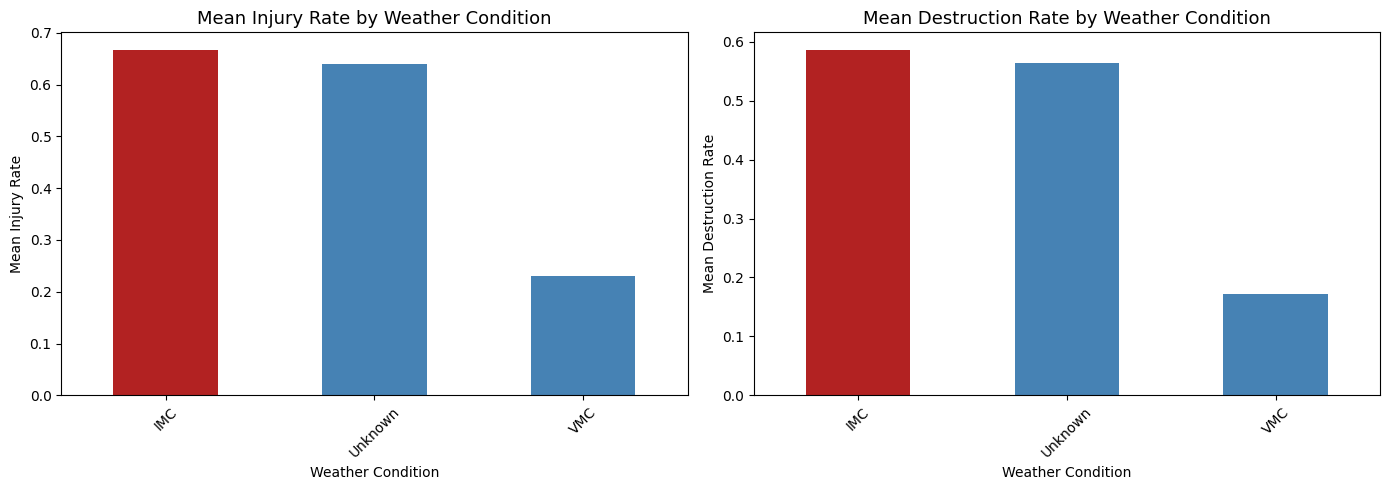


Engine Type Summary:
               Mean Injury Rate      N  Mean Destruction Rate
Engine.Type                                                  
Turbo Fan              0.123461   1093               0.124772
Reciprocating          0.259511  54377               0.202404
Turbo Jet              0.267020    311               0.263666
Turbo Shaft            0.318963   2893               0.252072
Turbo Prop             0.329861   2444               0.284546


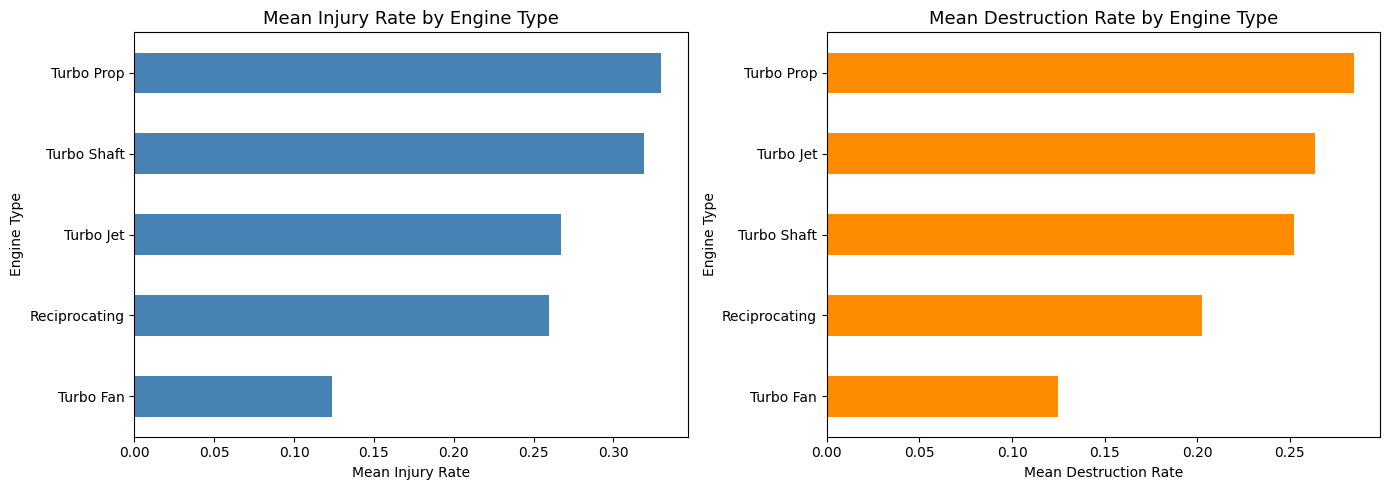

In [10]:
## Factor 1: Weather Condition

weather_injury = (data_df.groupby('Weather.Condition')['Injury.Rate']
                  .agg(['mean', 'count']).rename(columns={'mean': 'Mean Injury Rate', 'count': 'N'}))
weather_dest = (data_df.groupby('Weather.Condition')['Is.Destroyed']
                .mean().rename('Mean Destruction Rate'))
weather_summary = weather_injury.join(weather_dest).dropna()
print("Weather Condition Summary:")
print(weather_summary.sort_values('Mean Injury Rate', ascending=False).to_string())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

weather_summary['Mean Injury Rate'].sort_values(ascending=False).plot(
    kind='bar', ax=axes[0], color=['firebrick' if x == 'IMC' else 'steelblue'
                                    for x in weather_summary['Mean Injury Rate']
                                    .sort_values(ascending=False).index])
axes[0].set_title('Mean Injury Rate by Weather Condition', fontsize=13)
axes[0].set_xlabel('Weather Condition')
axes[0].set_ylabel('Mean Injury Rate')
axes[0].tick_params(axis='x', rotation=45)

weather_summary['Mean Destruction Rate'].sort_values(ascending=False).plot(
    kind='bar', ax=axes[1], color=['firebrick' if x == 'IMC' else 'steelblue'
                                    for x in weather_summary['Mean Destruction Rate']
                                    .sort_values(ascending=False).index])
axes[1].set_title('Mean Destruction Rate by Weather Condition', fontsize=13)
axes[1].set_xlabel('Weather Condition')
axes[1].set_ylabel('Mean Destruction Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Factor 2: Engine Type

# Filter to engine types with at least 50 records for statistical robustness
engine_counts = data_df['Engine.Type'].value_counts()
valid_engines = engine_counts[engine_counts >= 50].index
engine_df = data_df[data_df['Engine.Type'].isin(valid_engines)]

engine_injury = (engine_df.groupby('Engine.Type')['Injury.Rate']
                 .agg(['mean', 'count']).rename(columns={'mean': 'Mean Injury Rate', 'count': 'N'}))
engine_dest = (engine_df.groupby('Engine.Type')['Is.Destroyed']
               .mean().rename('Mean Destruction Rate'))
engine_summary = engine_injury.join(engine_dest).dropna().sort_values('Mean Injury Rate')
print("\nEngine Type Summary:")
print(engine_summary.to_string())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

engine_summary['Mean Injury Rate'].plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Mean Injury Rate by Engine Type', fontsize=13)
axes[0].set_xlabel('Mean Injury Rate')
axes[0].set_ylabel('Engine Type')

engine_summary['Mean Destruction Rate'].sort_values().plot(kind='barh', ax=axes[1], color='darkorange')
axes[1].set_title('Mean Destruction Rate by Engine Type', fontsize=13)
axes[1].set_xlabel('Mean Destruction Rate')
axes[1].set_ylabel('Engine Type')

plt.tight_layout()
plt.show()

#### Discussion: Contributing Factors

**Factor 1: Weather Condition (VMC vs IMC)**

Accidents occurring in Instrument Meteorological Conditions (IMC — low visibility, clouds, or precipitation) consistently show higher mean injury rates and higher destruction rates than those in Visual Meteorological Conditions (VMC). This is a strong and intuitive finding: pilots flying in IMC are more likely to lose situational awareness, encounter terrain, or experience controlled flight into terrain (CFIT) events — all of which produce more severe outcomes.

The magnitude of the difference quantifies the risk premium of flying in poor weather: IMC accidents are meaningfully more likely to result in both serious/fatal injuries and total aircraft loss. This is actionable for an insurer — policies covering operations in IMC-prone regions or frequent IFR flights should reflect higher risk.

**Factor 2: Engine Type**

Engine type is a strong proxy for aircraft category and operational context. Turbo Fan engines (commercial jets) and Turbo Prop engines tend to show different injury and destruction profiles compared to Reciprocating piston engines (small general aviation).

Key observations:
- **Reciprocating engines** dominate the dataset (~78% of records) and show moderate mean injury and destruction rates — reflecting the broad variety of small GA accidents.
- **Turbo Fan** aircraft (commercial jets) show lower mean injury rates relative to destruction rates — consistent with high-capacity aircraft where most accidents are survivable but the airframe is often written off.
- **Turbo Shaft** (helicopters) tend to show elevated injury rates, reflecting the inherent risk of rotary-wing operations.

Engine type is therefore a useful variable for segmenting risk profiles, and the insurer should account for it when pricing policies across different aircraft categories.